In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heights.csv')
df.head()

,name,height
0,Aarav,5.45
1,Deepika,5.61
2,Abhishek,5.65
3,Sneha,5.52
4,Kriti,5.69


In [3]:
df.shape

(1000, 2)

In [4]:
mean = round(df['height'].mean(),2)
std = round(df['height'].std(),2)

mean, std

(np.float64(5.61), np.float64(0.33))

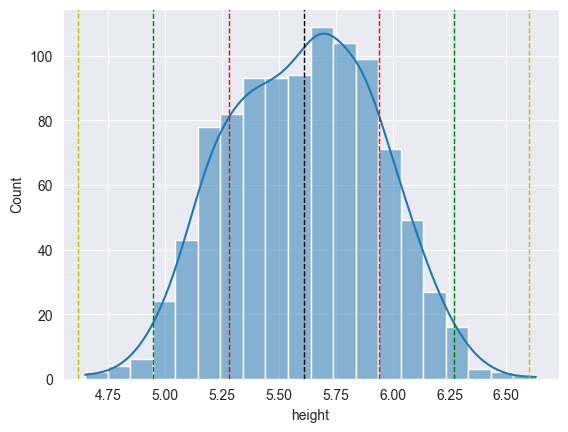

In [5]:
sns.histplot(df['height'], bins=20, kde=True)

plt.axvline(mean, color='black', linestyle='dashed', linewidth=1)

plt.axvline(mean+std, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean-std, color='r', linestyle='dashed', linewidth=1)

plt.axvline(mean+2*std, color='g', linestyle='dashed', linewidth=1)
plt.axvline(mean-2*std, color='g', linestyle='dashed', linewidth=1)

plt.axvline(mean+3*std, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mean-3*std, color='y', linestyle='dashed', linewidth=1)

plt.show()

In [6]:
left1 = round(mean-std,2)
right1 = round(mean+std,2)

left2 = round(mean-2*std,2)
right2 = round(mean+2*std,2)

left3 = round(mean-3*std,2)
right3 = round(mean+3*std,2)

In [7]:
df[(df['height'] > left1) & (df['height'] < right1)].shape

(641, 2)

In [8]:
df[(df['height'] > left2) & (df['height'] < right2)].shape

(970, 2)

In [9]:
df[(df['height'] > left3) & (df['height'] < right3)].shape

(999, 2)

In [10]:
df['z_score'] = (df['height'] - mean) / std

df

,name,height,z_score
0,Aarav,5.45,-0.484848
1,Deepika,5.61,0.000000
2,Abhishek,5.65,0.121212
3,Sneha,5.52,-0.272727
4,Kriti,5.69,0.242424
...,...,...,...
995,Susan,5.51,-0.303030
996,Sarah,5.85,0.727273
997,Susan,6.12,1.545455
998,Michael,5.81,0.606061


In [11]:
df[(df['z_score'] < -3) & (df['z_score'] > 3)]

,name,height,z_score


<Axes: xlabel='z_score', ylabel='Count'>

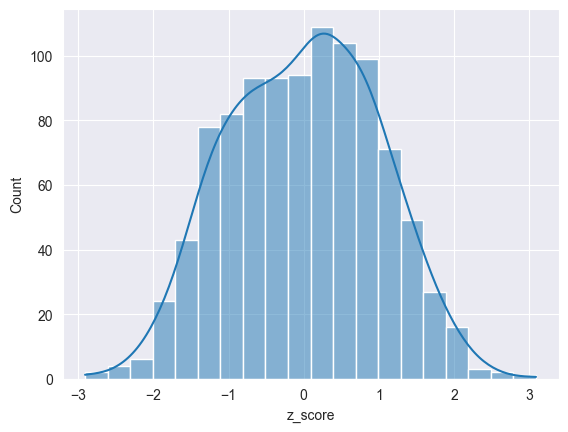

In [12]:
sns.histplot(df['z_score'], bins=20, kde=True)

In [13]:
df = pd.read_csv('bill_survey.csv')
df.head()

,City,Bill
0,Mumbai,15400
1,Mumbai,6700
2,Mumbai,16300
3,Mumbai,2100
4,Mumbai,4600


In [14]:
df.City.nunique()

207

<Axes: xlabel='Bill', ylabel='Count'>

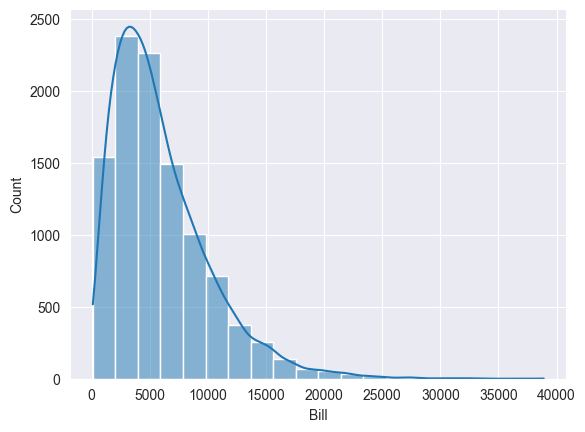

In [15]:
sns.histplot(df['Bill'], bins=20, kde=True)

In [16]:
# group by city and take mean of the data of bill
df.groupby('City')['Bill'].mean()

City
Agartala         6276.0
Agra             6084.0
Ahmedabad        5990.0
Ahmednagar       5588.0
Aizawl           5680.0
                  ...  
Vasai-Virar      5704.0
Vijayanagaram    7326.0
Vijayawada       5908.0
Visakhapatnam    6384.0
Warangal         5646.0
Name: Bill, Length: 207, dtype: float64

<Axes: xlabel='Bill', ylabel='Count'>

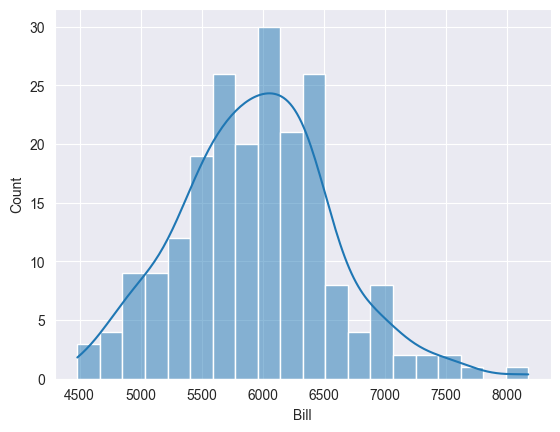

In [17]:
# print the histogram of the data of bill for each city
sns.histplot(df.groupby('City')['Bill'].mean(), bins=20, kde=True)

In [18]:
df = pd.read_csv('miles.csv')
df.head()

,date,is_weekend,miles
0,2022-01-01,False,27
1,2022-01-02,True,5
2,2022-01-03,False,36
3,2022-01-04,False,32
4,2022-01-05,False,23


In [19]:
df.shape

(730, 3)

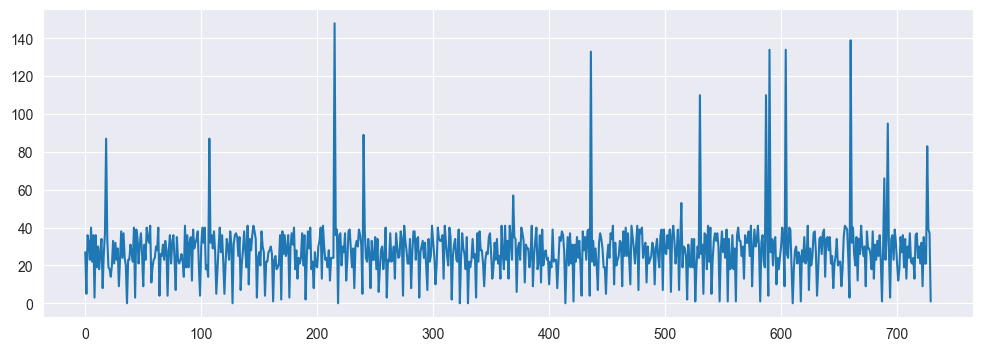

In [20]:
plt.figure(figsize=(12,4))
plt.plot(df['miles'])

<Axes: xlabel='miles', ylabel='Count'>

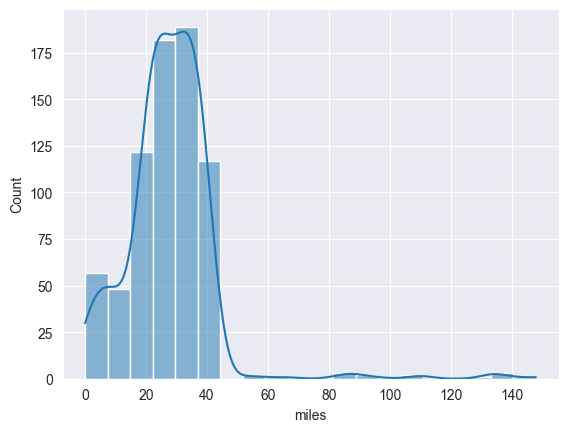

In [21]:
sns.histplot(df['miles'], bins=20, kde=True)

In [22]:
SAMPLE_SIZE = 50

sample = df.sample(SAMPLE_SIZE, random_state=100)
sample.head()

,date,is_weekend,miles
184,2022-07-04,False,24
535,2023-06-20,False,36
299,2022-10-27,False,41
221,2022-08-10,False,20
152,2022-06-02,False,38


In [23]:
s_mean, s_std = sample['miles'].mean(), sample['miles'].std()
s_mean, s_std

(np.float64(25.82), np.float64(8.805587280070466))

In [24]:
mean, std = df['miles'].mean(), df['miles'].std()
mean, std

(np.float64(27.627397260273973), np.float64(15.437588497596291))

In [25]:
import scipy.stats as st

z_score = st.norm.ppf(0.995)
z_score

np.float64(2.5758293035489004)

In [26]:
import numpy as np

margin_of_error = z_score * (std / np.sqrt(SAMPLE_SIZE))
margin_of_error

np.float64(5.623562647993804)

In [27]:
lower, upper = s_mean - margin_of_error, s_mean + margin_of_error

lower, upper

(np.float64(20.196437352006196), np.float64(31.443562647993804))